In [15]:
import glob
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import color, data, io, filters, exposure, util
from skimage.util import crop 

## Access of Photos

In [5]:
# croping fucntion crops the images to the section of the gap of the entire image
filenames = glob.glob('Knees/*.png', recursive = True)
print(filenames[:5])


['Knees/SevereG4 (1).png', 'Knees/DoubtfulG1 (1).png', 'Knees/NormalG0 (1).png', 'Knees/ModerateG3 (1).png', 'Knees/MildG2 (1).png']


In [6]:
filenames

['Knees/SevereG4 (1).png',
 'Knees/DoubtfulG1 (1).png',
 'Knees/NormalG0 (1).png',
 'Knees/ModerateG3 (1).png',
 'Knees/MildG2 (1).png']

## Opening Image and Cropping it

In [7]:
img = io.imread(filenames[2])
img

array([[[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[113, 113, 113],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[113, 113, 113],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       ...,

       [[ 11,  11,  11],
        [ 23,  23,  23],
        [ 31,  31,  31],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 49,  49,  49]],

       [[  9,   9,   9],
        [ 20,  20,  20],
        [ 28,  28,  28],
        ...,
        [ 54,  54,  54],
        [ 51,  51,  51],
        [ 49,  49,  49]],

       [[  6,   6,   6],
        [ 17,  17,  17],
        [ 25,  25,  25],
        ...,
        [ 55,  55,  55],
        [ 52,  52,  52],
        [ 49,  49,  49]]

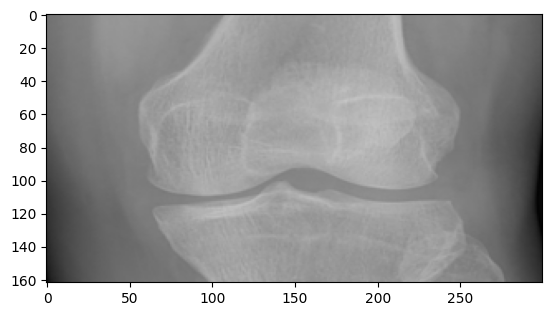

In [8]:
plt.imshow(img)
plt.show()

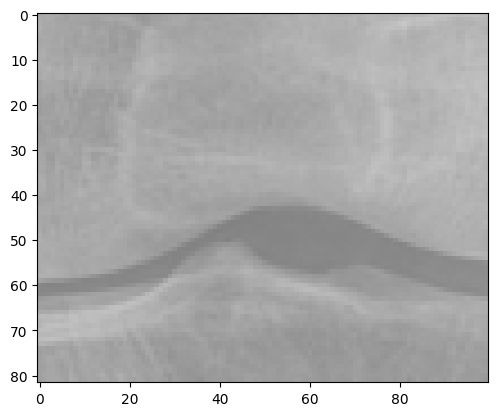

In [9]:
#(a, b) --> (from the top, from the bottom)
#(c, d) --> (from the left, from the right)
#(0, 0) --> (keep all color info intact)
B = crop(img, ((50, 30), (100, 100), (0,0)), copy=False)
plt.imshow(B)
plt.show()

## Converting the Image from Gray to RBG 

In [ ]:
#since the image had rgb values, converting the image to gray will allow hisotrgam equalization
gray= rgb2gray(B)
print(gray.shape) #to check if it turned gray, the shape must have two values 

(82, 100)


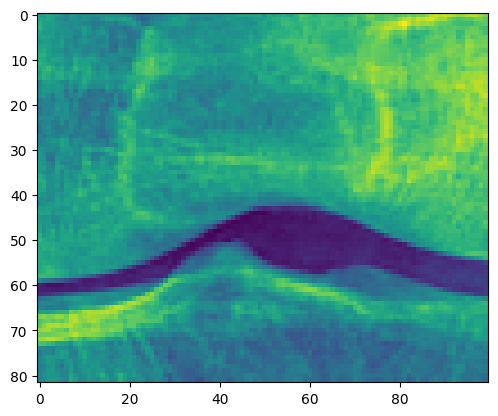

In [11]:
plt.imshow(gray)
plt.show()

## Histogram Equalization Process

In [13]:
# histogram equalization - image processing of contrast adjustment using the image's histograme
equalized = exposure.equalize_hist(gray)
print(equalized)

[[0.57182927 0.57182927 0.67121951 ... 0.99585366 0.97027178 0.95426829]
 [0.67121951 0.59817944 0.67121951 ... 0.9394338  0.9394338  0.8939216 ]
 [0.72841463 0.59817944 0.57182927 ... 0.8797561  0.8939216  0.8939216 ]
 ...
 [0.29131185 0.3545122  0.49208014 ... 0.20195122 0.2654878  0.23358188]
 [0.29131185 0.40506098 0.49208014 ... 0.20195122 0.1736446  0.16079268]
 [0.2654878  0.3545122  0.53426829 ... 0.22039024 0.1736446  0.12319512]]


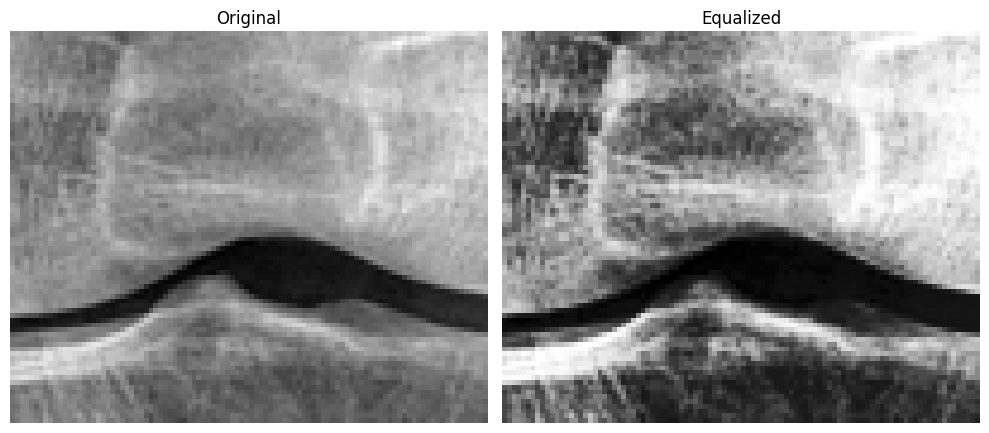

In [ ]:
#comparison of the original and equalized image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(equalized, cmap='gray')
ax[1].set_title("Equalized")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

## Creating Histogram Graphs

In [17]:
#collecting the data points from the equalizated image to create a histogram
equ_image = util.img_as_ubyte(equalized)
hist, hist_center = exposure.histogram(equ_image)

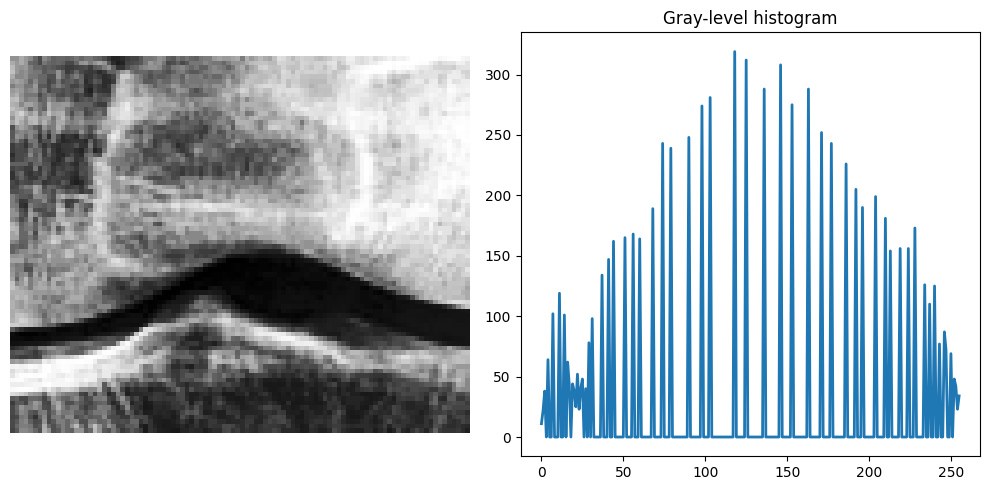

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(equ_image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].plot(hist_center, hist, lw=2)
ax[1].set_title('Gray-level histogram')

fig.tight_layout()